<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/hierachical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical clustering

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs #librería para generar nuestro dataset
from sklearn.cluster import AgglomerativeClustering #librería para ejecutar clustering gerárquico aglomerativo
from sklearn.metrics import silhouette_score  # para medir el performance del clustering
from scipy.cluster.hierarchy import dendrogram, linkage #para visualizar dendrograma

## Preparando datos de prueba

In [51]:
# Generamos datos en dos dimensiones (features) y centroides
# X tiene los datos en dos dimensiones
# y tiene el cluster al que pertenece cada par de datos
# c tiene los centroides

X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

# Generamos dataframe con los datos de dos dimensiones
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

In [52]:
print(X.shape)
print(y.shape)
print(c.shape)
print(df_blobs.shape)
print(df_centers.shape)

(500, 2)
(500,)
(4, 2)
(500, 3)
(4, 2)


## Visualización de datos

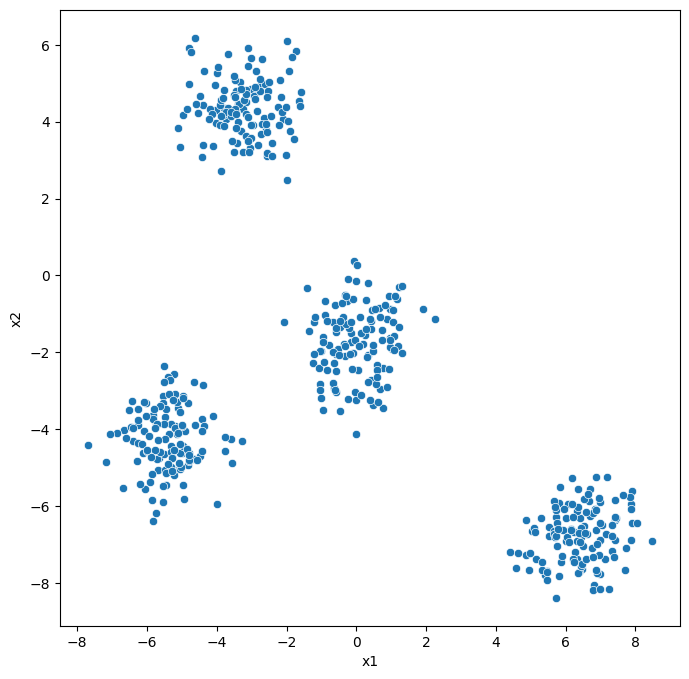

In [53]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
plt.show()

## Dendrograma y hierarchical clustering

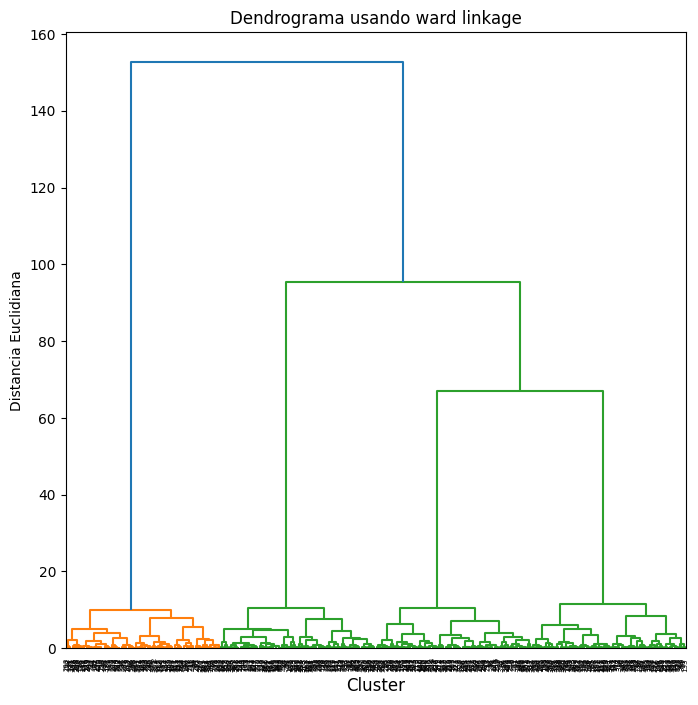

In [54]:
fig = plt.figure(figsize=(8,8))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

# La gráfica arroja que para 4, 3 y 2 clústers son buenos candidatos, porque están bien separados

In [63]:
# Aplicamos hirarquical cluster aglomerativo
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [64]:
y_hc

array([1, 2, 3, 1, 1, 1, 3, 3, 1, 1, 0, 3, 1, 2, 2, 2, 1, 3, 3, 0, 0, 1,
       2, 0, 3, 3, 3, 3, 2, 0, 0, 3, 1, 3, 1, 1, 2, 2, 0, 0, 1, 3, 2, 3,
       2, 2, 3, 3, 3, 0, 2, 0, 3, 0, 1, 2, 1, 3, 0, 0, 0, 2, 3, 3, 3, 0,
       0, 1, 0, 0, 1, 1, 0, 3, 2, 3, 1, 1, 3, 2, 0, 2, 0, 1, 2, 0, 0, 1,
       0, 0, 3, 0, 3, 1, 3, 1, 3, 2, 3, 2, 0, 2, 3, 0, 3, 1, 0, 1, 0, 0,
       0, 0, 2, 3, 0, 3, 1, 0, 3, 0, 0, 1, 2, 2, 0, 2, 3, 1, 3, 2, 2, 0,
       1, 0, 2, 0, 3, 0, 1, 0, 3, 3, 1, 0, 0, 3, 1, 0, 2, 1, 3, 1, 3, 0,
       0, 0, 1, 3, 0, 2, 2, 2, 0, 3, 1, 1, 0, 2, 2, 3, 3, 2, 3, 3, 0, 2,
       1, 1, 2, 0, 1, 2, 3, 3, 2, 3, 1, 0, 1, 1, 3, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 2, 3, 2, 3, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3, 1,
       3, 1, 2, 0, 1, 3, 2, 2, 1, 1, 3, 1, 2, 3, 3, 2, 2, 0, 0, 3, 1, 0,
       2, 1, 1, 0, 3, 0, 3, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 3, 3, 3, 2, 1, 2, 0, 2, 2, 1, 3, 2, 1, 2, 3, 3, 2, 1, 0,
       1, 3, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 1, 0,

In [65]:
df_blobs['cluster_predict'] = y_hc

In [66]:
df_blobs.shape

(500, 4)

In [67]:
df_blobs.head()

,x1,x2,y,cluster_predict
0,-5.678771,-5.066108,2,1
1,-4.018164,4.312086,3,2
2,6.170330,-5.262246,0,3
3,-4.812387,-4.936539,2,1
4,-5.113395,-3.451580,2,1


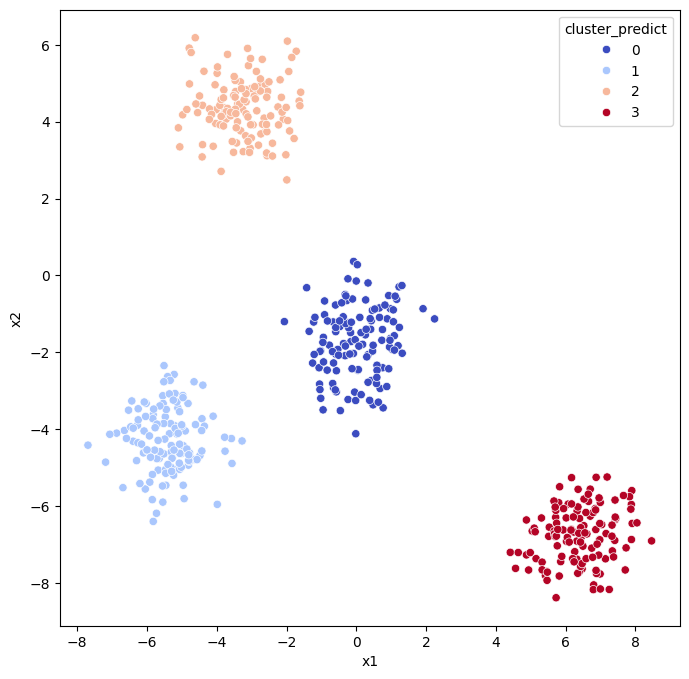

In [68]:
#graficamos los datos discriminando por los 4 clusters de la predicción

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster_predict', palette='coolwarm')
plt.show()

In [69]:
# si hubiéramos elegido 3 clusters
# Aplicamos hirarquical cluster aglomerativo
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [70]:
df_blobs['cluster_predict'] = y_hc

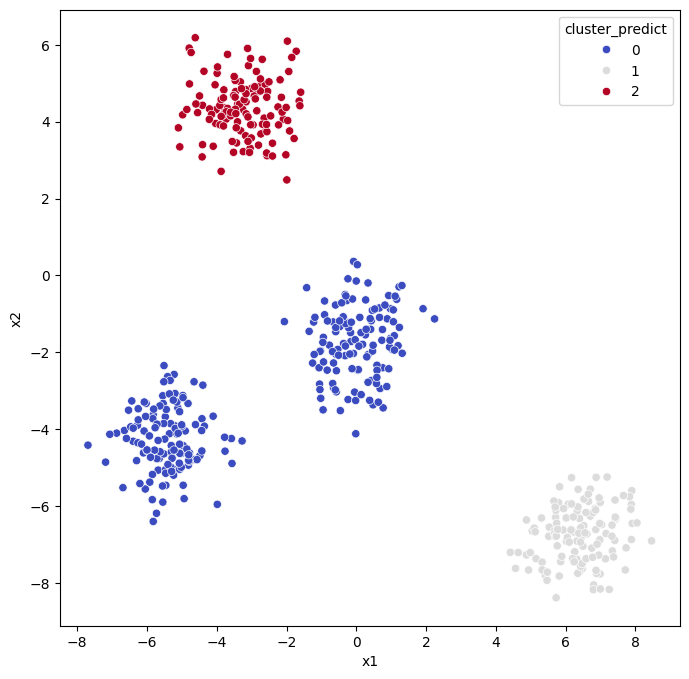

In [71]:
#graficamos los datos discriminando por los 3 clusters de la predicción

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster_predict', palette='coolwarm')
plt.show()

## Evaluación de hierarchical clustering